In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 加载数据
tr_data = pd.read_csv('./train_data.csv')
print tr_data.head()

# 样本量 特征量
m, n = tr_data.shape[0], tr_data.shape[1] - 1
print m, n

# 将样本的示例与标记拆分开
X = tr_data[tr_data.columns[:-1]]
Y = tr_data[tr_data.columns[-1:]]
print X.head()
print Y.head()

    x0   x1  y
0  3.0  3.0  1
1  4.0  3.0  1
2  1.0  1.0 -1
3 2
    x0   x1
0  3.0  3.0
1  4.0  3.0
2  1.0  1.0
   y
0  1
1  1
2 -1


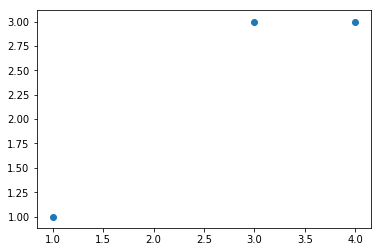

In [8]:
# 创建一个可视化界面
plt.scatter(X['x0'].values.T, X['x1'].values.T)

In [9]:
# 第一步：选择一个初始的 w,b 设定学习率
w = pd.DataFrame(np.array([1.0] * n)).values
b = [[1.0]]
r = 0.1
print w
print b
print r

while True: # 当样本是线性可分的，必然收敛

    # 计算在当前w和b条件下，分类是否正确
    delta_sign = (X.values.dot(w) + b) * Y.values
    print 'current sign'
    print delta_sign

    # 筛选出 sign <= 0的样本
    error_samples = tr_data[delta_sign <= 0]
    
    # 如果分错样本集为空，说明已经迭代结束
    if error_samples.empty:
        break
        
    # 从错误分类样本中，抽样一个样本进行迭代
    sample = error_samples.sample()
    ex = sample[sample.columns[:-1]]
    ey = sample[sample.columns[-1:]]
    print 'error_sample'
    print ex, ey

    # 迭代更新w和b
    w = w + ex.values.T.dot(ey.values) * r
    b = b + ey.values * r
    print 'current w, b'
    print w
    print b



[[1.]
 [1.]]
[[1.0]]
0.1
current sign
[[ 7.]
 [ 8.]
 [-3.]]
error_sample
    x0   x1
2  1.0  1.0    y
2 -1
current w, b
[[0.9]
 [0.9]]
[[0.9]]
current sign
[[ 6.3]
 [ 7.2]
 [-2.7]]
error_sample
    x0   x1
2  1.0  1.0    y
2 -1
current w, b
[[0.8]
 [0.8]]
[[0.8]]
current sign
[[ 5.6]
 [ 6.4]
 [-2.4]]
error_sample
    x0   x1
2  1.0  1.0    y
2 -1
current w, b
[[0.7]
 [0.7]]
[[0.7]]
current sign
[[ 4.9]
 [ 5.6]
 [-2.1]]
error_sample
    x0   x1
2  1.0  1.0    y
2 -1
current w, b
[[0.6]
 [0.6]]
[[0.6]]
current sign
[[ 4.2]
 [ 4.8]
 [-1.8]]
error_sample
    x0   x1
2  1.0  1.0    y
2 -1
current w, b
[[0.5]
 [0.5]]
[[0.5]]
current sign
[[ 3.5]
 [ 4. ]
 [-1.5]]
error_sample
    x0   x1
2  1.0  1.0    y
2 -1
current w, b
[[0.4]
 [0.4]]
[[0.4]]
current sign
[[ 2.8]
 [ 3.2]
 [-1.2]]
error_sample
    x0   x1
2  1.0  1.0    y
2 -1
current w, b
[[0.3]
 [0.3]]
[[0.3]]
current sign
[[ 2.1]
 [ 2.4]
 [-0.9]]
error_sample
    x0   x1
2  1.0  1.0    y
2 -1
current w, b
[[0.2]
 [0.2]]
[[0.2]]
current si

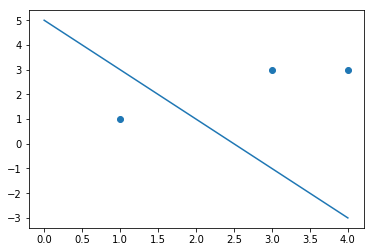

In [10]:
# 画出最终的结果
plt.scatter(X['x0'].values.T, X['x1'].values.T)
plt.plot([0, 4], [(-b[0][0] - w[0][0] * 0) / w[1][0], (-b[0][0] - w[0][0] * 4) / w[1][0]])

In [11]:
# 预测
te_data = pd.read_csv('./test_data.csv')
print te_data.head()

# 将样本的示例与标记拆分开
tX = te_data[te_data.columns[:-1]]

print (tX.values.dot(w) + b) >= 0

    x0   x1  y
0  0.0  0.0 -1
1  4.0  4.0  1
[[False]
 [ True]]
